In [18]:
import numpy as np
import pandas as pd
data=pd.read_csv(r'C:\Users\TEMP.MITS\Desktop\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
x=data.iloc[:,0:8].values
y=data.iloc[:,8:9].values

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=0)
rfc.fit(x_train,y_train)

C:\Users\TEMP~1.MIT\AppData\Local\Temp/ipykernel_8080/2822896566.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10, random_state=0)

In [11]:
rf_pred=rfc.predict(x_test)
rf_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc=accuracy_score(y_test,rf_pred)
cm=confusion_matrix(y_test,rf_pred)
print("Accuracy: ",acc)
print("Confusion matrix: ",cm)

Accuracy:  0.7857142857142857
Confusion matrix:  [[90 17]
 [16 31]]


In [15]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,rf_pred)
roc_auc=metrics.auc(fpr,tpr)

Matplotlib is building the font cache; this may take a moment.


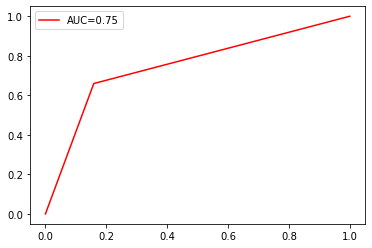

In [16]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='r')
plt.legend()